In [1]:
import keras
keras.__version__
import tensorflow as tf
tf.__version__

'2.8.2'

In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from tensorflow.keras.applications.resnet50 import ResNet50

In [3]:
def assign_label(img,label):
    return label

In [4]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [5]:
X=[]
Z=[]
IMG_SIZE=150
NOTFIRE='/content/drive/MyDrive/Fire-Detection/0'
FIRE='/content/drive/MyDrive/Fire-Detection/1'

make_train_data('NOTFIRE',NOTFIRE)
make_train_data('FIRE',FIRE)

100%|██████████| 110/110 [00:02<00:00, 39.22it/s]


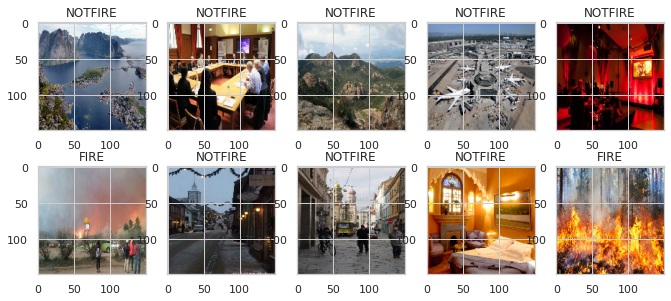

In [6]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(10,10)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

In [7]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1337)

np.random.seed(42)
rn.seed(42)
#tf.set_random_seed(42)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [8]:
base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='max')
base_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [9]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.20))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [10]:
epochs=25
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
base_model.trainable=True # setting the VGG model to be trainable.
model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 30,408,066
Trainable params: 30,354,946
No

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
History = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/25
16/16 [==============================] - 184s 11s/step - loss: 1.1454 - accuracy: 0.7418 - val_loss: 0.5303 - val_accuracy: 0.8282
Epoch 2/25
16/16 [==============================] - 170s 11s/step - loss: 0.3039 - accuracy: 0.8852 - val_loss: 0.3735 - val_accuracy: 0.8650
Epoch 3/25
16/16 [==============================] - 171s 11s/step - loss: 0.1955 - accuracy: 0.9324 - val_loss: 0.2166 - val_accuracy: 0.9080
Epoch 4/25
16/16 [==============================] - 170s 11s/step - loss: 0.0763 - accuracy: 0.9672 - val_loss: 0.2249 - val_accuracy: 0.9018
Epoch 5/25
16/16 [==============================] - 172s 11s/step - loss: 0.0492 - accuracy: 0.9877 - val_loss: 0.1606 - val_accuracy: 0.9509
Epoch 6/25
16/16 [==============================] - 172s 11s/step - loss: 0.0323 - accuracy: 0.9898 - val_loss: 0.1486 - val_accuracy: 0.9571
Epoch 7/25
16/16 [==============================] - 170s 11s/step - loss: 0.0369 - accuracy: 0.9816 - val_loss: 0.1507 - val_accuracy: 0.9448
Epoch 

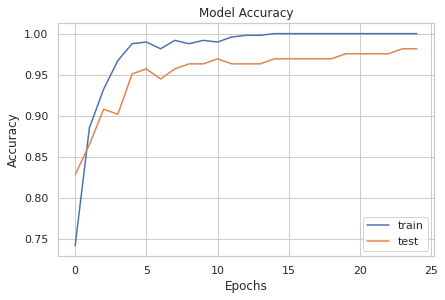

In [12]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

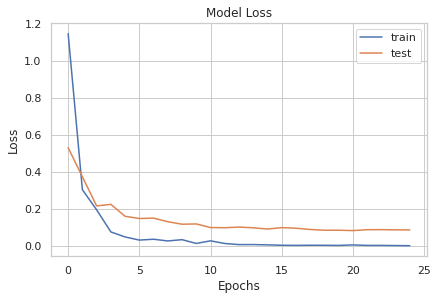

In [13]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [28]:
# Zero class test:

from keras.preprocessing import image
# NOW predict using the built model!!!

path = "/content/drive/MyDrive/Fire-Detection/0/1.jpg"
# Load path of image (X-ray u want to predict)
img = image.load_img(path, target_size = (150, 150))

#img = image.img_to_array(img)/150
#img = np.array([img])
img = np.array(img)
   # X = X/255
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

In [30]:
np.round(model.predict(img))

array([[0., 1.]], dtype=float32)

In [31]:
# 1 class test:

from keras.preprocessing import image
# NOW predict using the built model!!!

path = "/content/drive/MyDrive/Fire-Detection/1/10.jpg"
# Load path of image (X-ray u want to predict)
img = image.load_img(path, target_size = (150, 150))

#img = image.img_to_array(img)/150
#img = np.array([img])
img = np.array(img)
   # X = X/255
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

In [32]:
np.round(model.predict(img))

array([[1., 0.]], dtype=float32)

In [33]:
# New pic - Aruco test:

from keras.preprocessing import image
# NOW predict using the built model!!!

path = "/content/drive/MyDrive/Firedetect/arucotestimage.png"
# Load path of image (X-ray u want to predict)
img = image.load_img(path, target_size = (150, 150))

#img = image.img_to_array(img)/150
#img = np.array([img])
img = np.array(img)
   # X = X/255
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

In [34]:
np.round(model.predict(img))
# tested correct!!

array([[0., 1.]], dtype=float32)

In [35]:
# New pic - Aruco test:

from keras.preprocessing import image
# NOW predict using the built model!!!

path = "/content/drive/MyDrive/Firedetect/daytest.png"
# Load path of image (X-ray u want to predict)
img = image.load_img(path, target_size = (150, 150))

#img = image.img_to_array(img)/150
#img = np.array([img])
img = np.array(img)
   # X = X/255
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

In [36]:
np.round(model.predict(img))
# tested correct!! differentiated day from fire light

array([[0., 1.]], dtype=float32)

In [39]:
# New pic - Aruco test:

from keras.preprocessing import image
# NOW predict using the built model!!!

path = "/content/drive/MyDrive/Firedetect/firebuilding.png"
# Load path of image (X-ray u want to predict)
img = image.load_img(path, target_size = (150, 150))

#img = image.img_to_array(img)/150
#img = np.array([img])
img = np.array(img)
   # X = X/255
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

In [40]:
np.round(model.predict(img))
# detected fire

array([[1., 0.]], dtype=float32)